# Database Description

Importation of database and creation of dataframe

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df = pd.read_csv(r'/Users/ijtsiramos/Downloads/CienciadeDatos_ML/HepatitisCdata.csv')


Display the first few rows of the DataFrame and information of the attributes


In [2]:
print(df.head())
print(df.info())


   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   A

## Description of the database

In [3]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Calculation of the mean, median, mode and standard deviation for all numerical attributes

In [4]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns].dropna()
data_dict = {}

for i, column in enumerate(numerical_columns):
    # Mean
    mean = sum(df_numerical[column]) / len(df_numerical[column])
    
    # Median
    n = len(df_numerical[column])
    index = n // 2
    if n % 2:
        median = sorted(df_numerical[column])[index]
    else:
        median = sum(sorted(df_numerical[column])[index - 1:index + 1]) / 2
    
    # Mode
    counter = Counter(df_numerical[column])
    max_frequency = counter.most_common(1)[0][1]
    
    mode = [key for key, value in counter.items() if value == max_frequency]
    if len(mode)>1:
        mode= "-"
    
    # Standard Deviation
    squared_diff = [(x - mean) ** 2 for x in df_numerical[column]]
    variance = sum(squared_diff) / (n - 1)
    standard_deviation = variance ** 0.5
    
    # Create a dictionary for the current row
    row_dict = {
        'Mean': round(mean,2),
        'Mode': mode,
        'Median': round(median,2),
        'Variance': round(variance,2),
        'Standard Deviation': round(standard_deviation,2)
    }
    
    # Add the row dictionary to the data dictionary
    data_dict[column] = row_dict

df1 = pd.DataFrame(data_dict)
#df1.index = numerical_columns 

print(df1)

                                                                                        

                   Unnamed: 0    Age    ALB     ALP     ALT      AST     BIL  \
Mean                   298.65  47.42  41.62   68.12   26.58    33.77   11.02   
Mode                        -   [46]      -  [61.2]  [16.6]        -   [6.0]   
Median                    296     47   41.9    66.2    22.7     25.7     7.1   
Variance             30325.61  98.63   33.2   671.9  435.27  1080.23  302.99   
Standard Deviation     174.14   9.93   5.76   25.92   20.86    32.87   17.41   

                       CHE  CHOL     CREA      GGT    PROT  
Mean                   8.2  5.39    81.67     38.2   71.89  
Mode                [7.52]     -   [74.0]        -  [71.9]  
Median                8.26  5.31     77.0     22.8    72.1  
Variance               4.8  1.27  2570.18  2948.75   28.61  
Standard Deviation    2.19  1.13     50.7     54.3    5.35  


Covariance matrix for all numerical values

In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]
df_mean_null = df_numerical.fillna(df.mean())

num_vars = len(df_mean_null)

# Calculate the means of all variables
means = df_mean_null.mean()

# Initialize the covariance matrix with zeros
covariance_matrix = pd.DataFrame(index=df_mean_null.columns, columns=df_mean_null.columns)

# Calculate the covariance between all pairs of variables
for i, col_i in enumerate(df_mean_null.columns):
    for j, col_j in enumerate(df_mean_null.columns):
        covariance_matrix.at[col_i, col_j] = round(sum((df_mean_null[col_i][k] - means[col_i]) * (df_mean_null[col_j][k] - means[col_j]) for k in range(len(df_mean_null))) / (len(df_mean_null) - 1),2)

print(covariance_matrix)


/var/folders/np/dhbqpzqs0p9cw8x5fjnht4z40000gn/T/ipykernel_8055/4153210064.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_null = df_numerical.fillna(df.mean())


           Unnamed: 0     Age    ALB     ALP     ALT      AST     BIL     CHE  \
Unnamed: 0    31570.0  751.22 -317.5  102.07 -158.24  1955.69  634.29 -106.03   
Age            751.22  101.11 -11.44   43.44   -1.54     29.5    6.43   -1.67   
ALB            -317.5  -11.44  33.36  -20.57    0.24   -36.96  -25.19    4.79   
ALP            102.07   43.44 -20.57  657.61  112.55    52.78   24.52    1.86   
ALT           -158.24   -1.54   0.24  112.55  647.65   230.17  -19.26    8.25   
AST           1955.69    29.5 -36.96   52.78  230.17  1094.99  203.26  -15.22   
BIL            634.29    6.43 -25.19   24.52  -19.26   203.26  387.03  -14.46   
CHE           -106.03   -1.67   4.79    1.86    8.25   -15.22  -14.46    4.86   
CHOL           -17.11     1.4   1.33    3.51    1.94    -7.71   -3.45    1.04   
CREA          -229.74  -11.15  -0.45  190.82  -54.48   -35.21   30.56   -1.22   
GGT           2406.49   84.14 -49.11  619.93   345.1   888.58  233.38   -13.3   
PROT          -109.09   -8.3

Pearson correlation for all numerical attributes

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]
df_mean_null = df_numerical.fillna(df.mean())

# Calculate the means of all variables
means = df_mean_null.mean()

# Initialize the correlation matrix with zeros
correlation_matrix = pd.DataFrame(index=df_mean_null.columns, columns=df_mean_null.columns)

# Calculate the Pearson correlation between all pairs of variables
for i, col_i in enumerate(df_mean_null.columns):
    for j, col_j in enumerate(df_mean_null.columns):
        covariance = sum((df_mean_null[col_i][k] - means[col_i]) * (df_mean_null[col_j][k] - means[col_j]) for k in range(len(df_mean_null))) / (len(df_mean_null) - 1)
        std_dev_i = df_mean_null[col_i].std()
        std_dev_j = df_mean_null[col_j].std()
        correlation = covariance / (std_dev_i * std_dev_j)
        correlation_matrix.at[col_i, col_j] = correlation

print(correlation_matrix)


/var/folders/np/dhbqpzqs0p9cw8x5fjnht4z40000gn/T/ipykernel_8055/2301915079.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_null = df_numerical.fillna(df.mean())


           Unnamed: 0       Age       ALB       ALP       ALT       AST  \
Unnamed: 0        1.0  0.420477 -0.309379  0.022402 -0.034996  0.332626   
Age          0.420477       1.0 -0.197005  0.168473 -0.006017  0.088666   
ALB         -0.309379 -0.197005       1.0 -0.138858  0.001606 -0.193397   
ALP          0.022402  0.168473 -0.138858       1.0  0.172461  0.062202   
ALT         -0.034996 -0.006017  0.001606  0.172461       1.0  0.273325   
AST          0.332626  0.088666 -0.193397  0.062202  0.273325       1.0   
BIL          0.181459  0.032492  -0.22165    0.0486 -0.038468  0.312231   
CHE         -0.270549 -0.075093  0.375848  0.032971  0.146953 -0.208536   
CHOL        -0.085709  0.123978  0.204803  0.121914  0.068023 -0.207507   
CREA        -0.025987 -0.022296 -0.001573  0.149554 -0.043025 -0.021387   
GGT          0.247781  0.153087 -0.155555  0.442262  0.248086  0.491263   
PROT        -0.113735 -0.153665  0.550033 -0.053633  0.094373  0.039888   

                 BIL    

Total count of each attribute, unique values of each attribute(observations) and total count of null values

In [7]:
total_count = df.count()
print("Total Count:")
print(total_count)


unique_count = df.nunique()
print("\nUnique Count:")
print(unique_count)


null_count = df.isnull().sum()
print("\nNull Count:")
print(null_count)

Total Count:
Unnamed: 0    615
Category      615
Age           615
Sex           615
ALB           614
ALP           597
ALT           614
AST           615
BIL           615
CHE           615
CHOL          605
CREA          615
GGT           615
PROT          614
dtype: int64

Unique Count:
Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           414
ALT           341
AST           297
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

Null Count:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


Distribution of the target attribute 


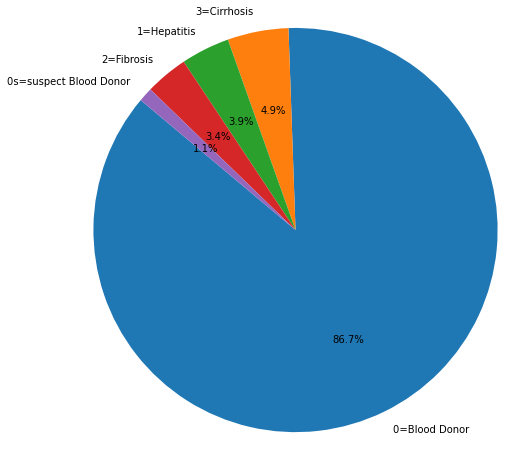

In [8]:
# Count the occurrences of each patient type
patient_type_counts = df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(patient_type_counts, labels=patient_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Display the instances with null values since the amount is not that great as to understand more about the missing values

Understand if there is a relationship between the missing values and a specific attribute (in this case, the target attribute)

In [9]:
null_counts_category = df.groupby('Category').apply(lambda x: x.isnull().sum())
print(null_counts_category)

                        Unnamed: 0  Category  Age  Sex  ALB  ALP  ALT  AST  \
Category                                                                     
0=Blood Donor                    0         0    0    0    0    0    0    0   
0s=suspect Blood Donor           0         0    0    0    0    0    0    0   
1=Hepatitis                      0         0    0    0    0    3    1    0   
2=Fibrosis                       0         0    0    0    0    9    0    0   
3=Cirrhosis                      0         0    0    0    1    6    0    0   

                        BIL  CHE  CHOL  CREA  GGT  PROT  
Category                                                 
0=Blood Donor             0    0     7     0    0     0  
0s=suspect Blood Donor    0    0     0     0    0     0  
1=Hepatitis               0    0     0     0    0     0  
2=Fibrosis                0    0     1     0    0     0  
3=Cirrhosis               0    0     2     0    0     1  


Distribution of the target class within each attribute's null values

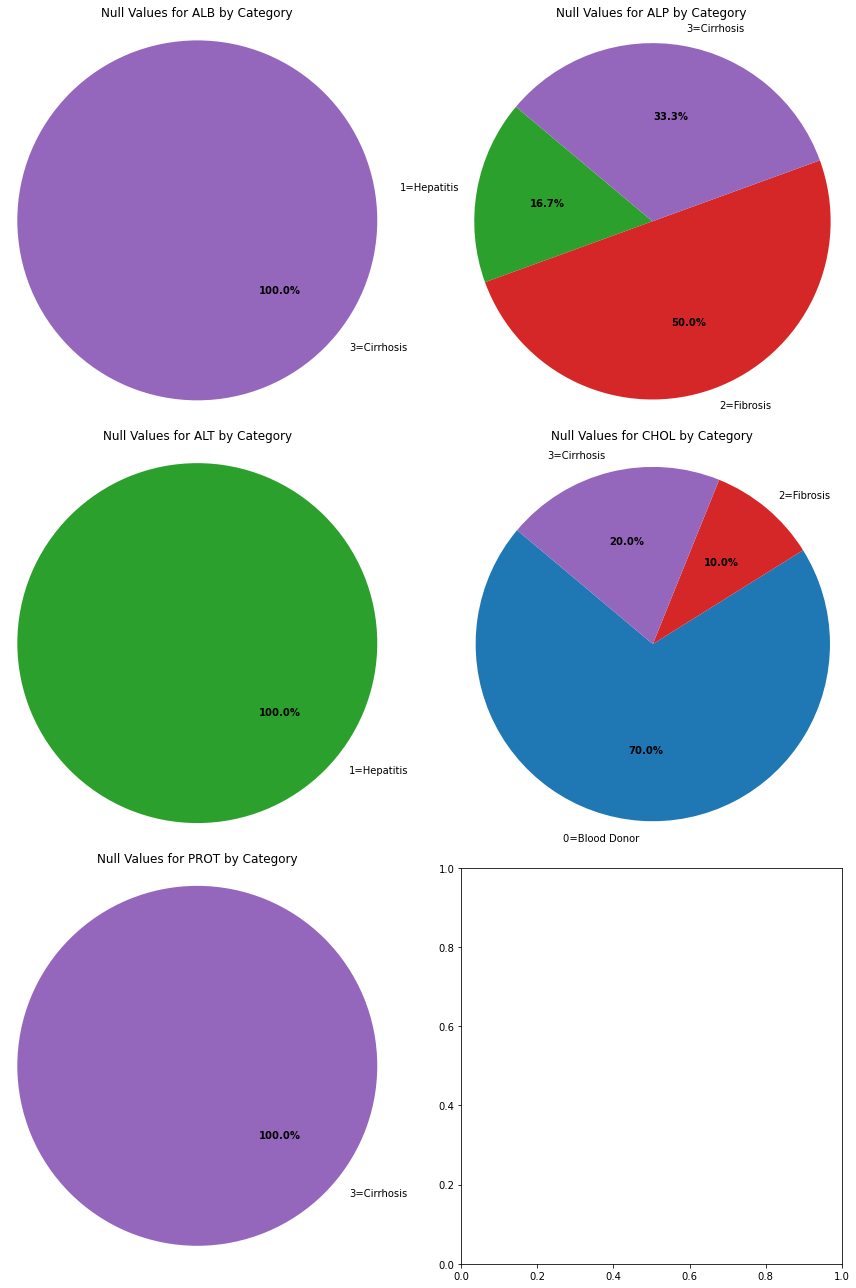

In [10]:
null_counts_by_category = df.groupby('Category').apply(lambda x: x.isnull().sum())

attributes_with_null = null_counts_by_category.columns[null_counts_by_category.sum() > 0]

num_plots = len(attributes_with_null)
num_plots_per_row = 2
num_rows = (num_plots + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(12, 6 * num_rows))

for idx, attribute in enumerate(attributes_with_null):
    row = idx // num_plots_per_row
    col = idx % num_plots_per_row
    ax = axes[row, col]

    patches, texts, autotexts = ax.pie(null_counts_by_category[attribute],
                                        labels=[label if value > 0 else '' for label, value in zip(null_counts_by_category.index, null_counts_by_category[attribute])],
                                        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                                        startangle=140, labeldistance=1.1)
    
    ax.set_title(f'Null Values for {attribute} by Category')
    ax.axis('equal')
    plt.setp(autotexts, size=10, weight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Display of null values within the dataframe

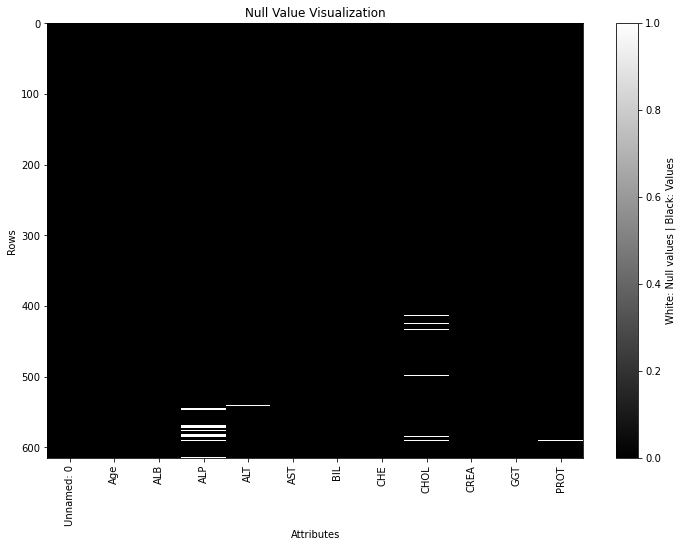

In [11]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Create a plot with black lines for values and white lines for nulls
plt.figure(figsize=(12, 8))
plt.imshow(df_numerical.isnull().values, cmap='gray', aspect='auto', interpolation='none')
plt.xticks(np.arange(len(df_numerical.columns)), df_numerical.columns, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Rows')
plt.title('Null Value Visualization')
plt.colorbar().set_label('White: Null values | Black: Values')
plt.show()

Distributions of attributes

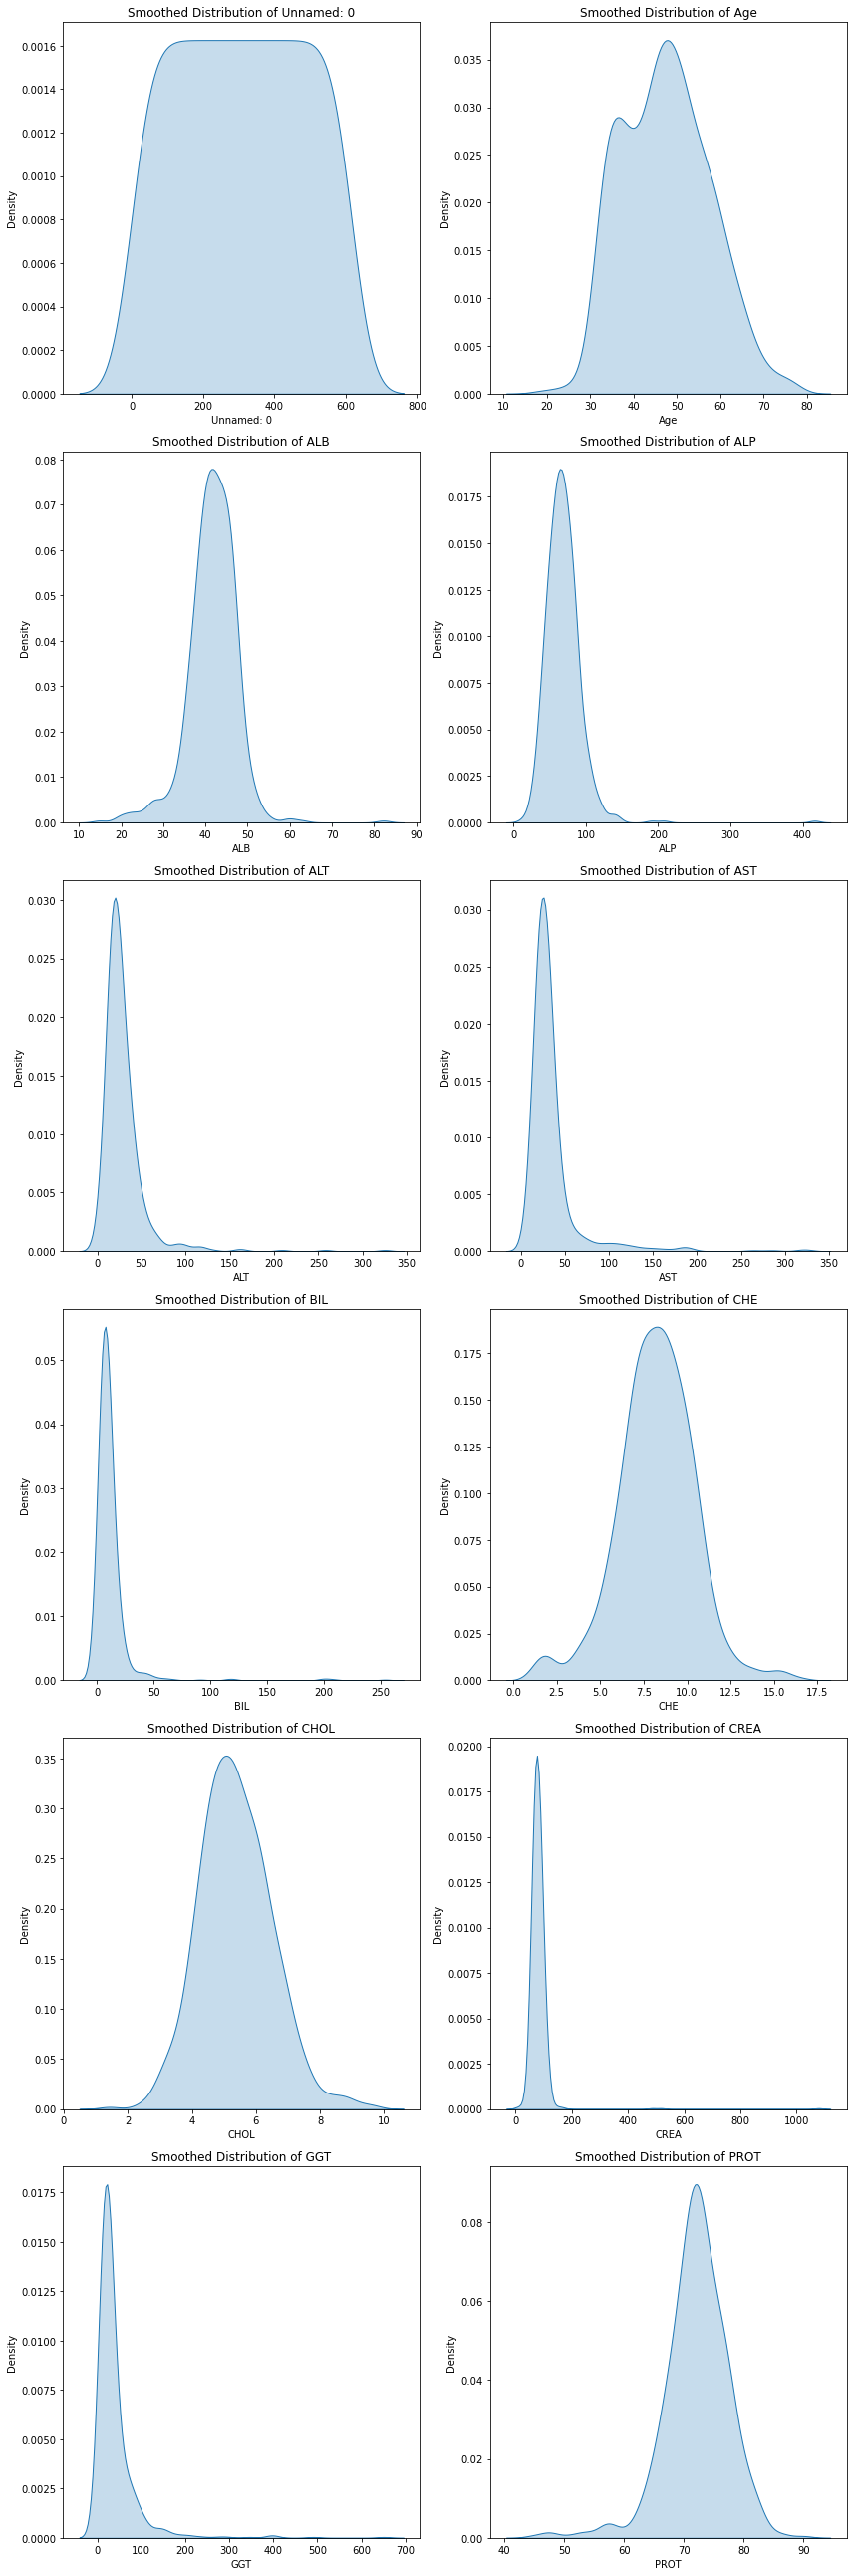

In [12]:

numerical_attributes = df.select_dtypes(include=['float64', 'int64'])

num_cols = len(numerical_attributes.columns)
num_rows = (num_cols + 1) // 2 

plt.figure(figsize=(12, num_rows * 6))
for i, column in enumerate(numerical_attributes.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.kdeplot(df[column].dropna(), shade=True)
    plt.title(f'Smoothed Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()  
plt.show()

Calculate outliers after doing data imputation with the mean 

In [13]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]
df_mean_null = df_numerical.fillna(df.mean())

outliers_count = {}

# Loop through each attribute and calculate the number of outliers
for col in df_mean_null.columns:
    # Calculate the quartiles for the current attribute
    q1 = df_mean_null[col].quantile(0.25)
    q3 = df_mean_null[col].quantile(0.75)

    # Calculate the IQR for the current attribute
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count the number of outliers for the current attribute
    outliers_count[col] = ((df_mean_null[col] < lower_bound) | (df_mean_null[col] > upper_bound)).sum()

print(outliers_count)

{'Unnamed: 0': 0, 'Age': 1, 'ALB': 27, 'ALP': 14, 'ALT': 36, 'AST': 64, 'BIL': 47, 'CHE': 24, 'CHOL': 12, 'CREA': 12, 'GGT': 65, 'PROT': 20}


/var/folders/np/dhbqpzqs0p9cw8x5fjnht4z40000gn/T/ipykernel_8055/1005000174.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_null = df_numerical.fillna(df.mean())


### Filling null values with the mean value of the affected attribute and comparison of the before and after distributions

In [14]:
attribute_means_by_category = df.groupby('Category').transform('mean')

# Replace null values with the corresponding attribute mean within each category
df_filled = df.copy()
for column in df.columns[df.isnull().any()]:
    mask = df[column].isnull()
    category_values = df.loc[mask, 'Category']
    df_filled.loc[mask, column] = attribute_means_by_category.loc[mask, column].values

/var/folders/np/dhbqpzqs0p9cw8x5fjnht4z40000gn/T/ipykernel_8055/1622411042.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  attribute_means_by_category = df.groupby('Category').transform('mean')


In [15]:
null_counts_category = df_filled.groupby('Category').apply(lambda x: x.isnull().sum())
print(null_counts_category)

                        Unnamed: 0  Category  Age  Sex  ALB  ALP  ALT  AST  \
Category                                                                     
0=Blood Donor                    0         0    0    0    0    0    0    0   
0s=suspect Blood Donor           0         0    0    0    0    0    0    0   
1=Hepatitis                      0         0    0    0    0    0    0    0   
2=Fibrosis                       0         0    0    0    0    0    0    0   
3=Cirrhosis                      0         0    0    0    0    0    0    0   

                        BIL  CHE  CHOL  CREA  GGT  PROT  
Category                                                 
0=Blood Donor             0    0     0     0    0     0  
0s=suspect Blood Donor    0    0     0     0    0     0  
1=Hepatitis               0    0     0     0    0     0  
2=Fibrosis                0    0     0     0    0     0  
3=Cirrhosis               0    0     0     0    0     0  


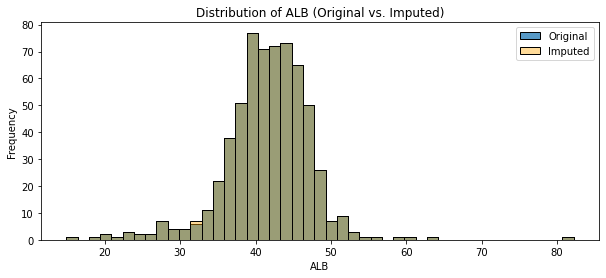

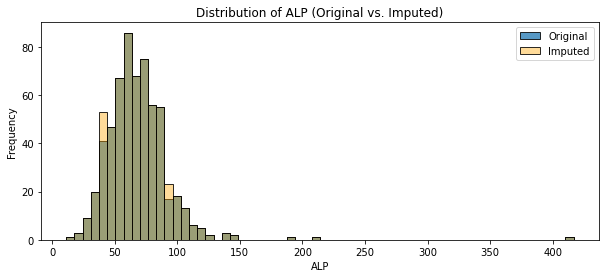

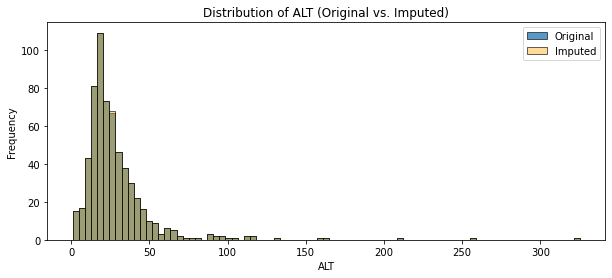

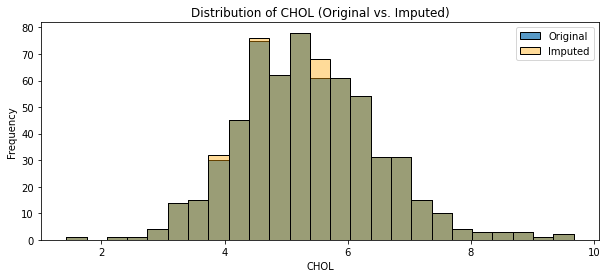

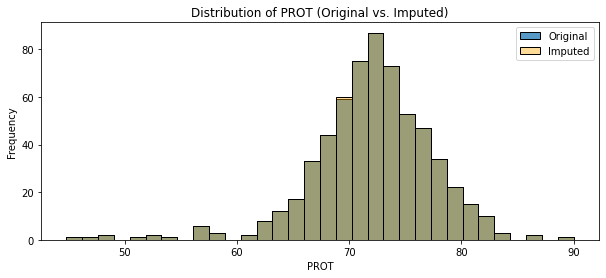

In [16]:
filled_numerical_attributes = df_filled.select_dtypes(include=['float64', 'int64'])
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

attributes_with_null = df.columns[df.isnull().any()]


for column in df_numerical.columns[df_numerical.isnull().any()]:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_numerical[column], label='Original')
    sns.histplot(filled_numerical_attributes[column],alpha=0.4, label='Imputed', color='orange')
    plt.title(f'Distribution of {column} (Original vs. Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### Linear correlation between attributes

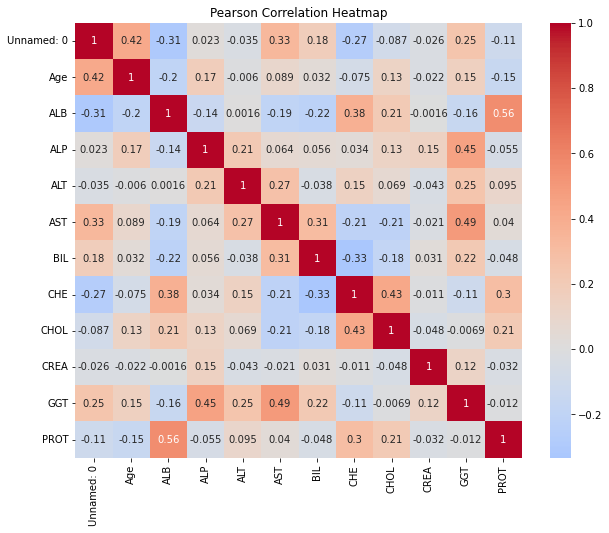

In [17]:
correlation_matrix = df.corr()

# Create a heatmap of the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

### Imputation with MICE (simplified own version)

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

def remove_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
filtered_df = pd.DataFrame()
for column in numerical_columns:
    filtered_df = pd.concat([filtered_df, remove_outliers(column)])

filtered_df.reset_index(drop=True, inplace=True)

In [19]:

numerical_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_with_missing = numerical_columns[filtered_df[numerical_columns].isnull().any()]

for column in numerical_columns_with_missing:
    imputed_df = filtered_df.copy()

    missing_mask = imputed_df[column].isnull()


    for _ in range(1000):  
        for col in imputed_df.columns:
            if col != column and col in numerical_columns: 

                non_missing_df = imputed_df[~missing_mask]

               
                model = np.polyfit(non_missing_df[col], non_missing_df[column], 1)

     
                imputed_df.loc[missing_mask, column] = np.polyval(model, imputed_df.loc[missing_mask, col])

    
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], label='Original')
    sns.histplot(imputed_df[column], label='Imputed', color='orange')
    plt.title(f'Distribution of {column} (Original vs. Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


LinAlgError: SVD did not converge in Linear Least Squares

### Imputation via MICE using library

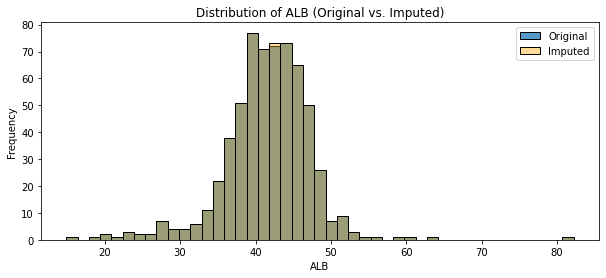

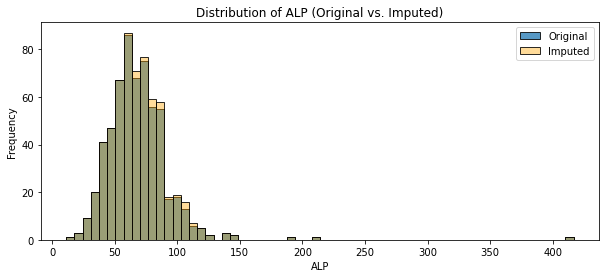

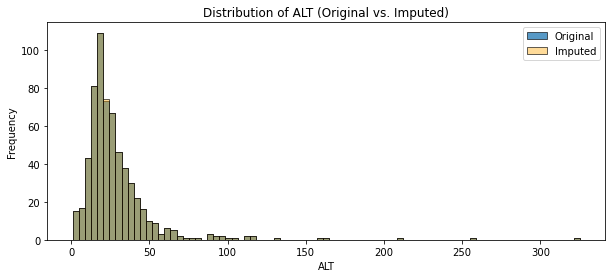

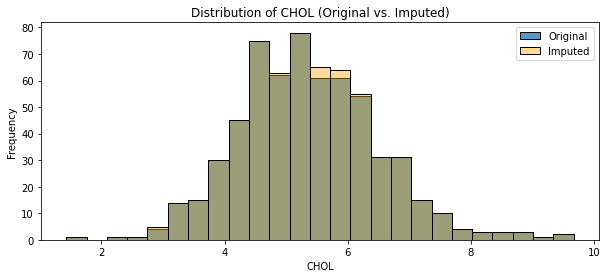

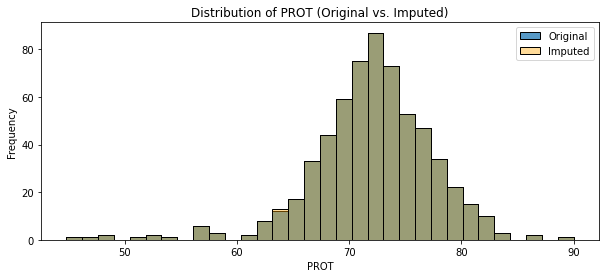

In [21]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
# Select only the numerical attributes for imputation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Initialize the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform MICE imputation on numerical attributes
imputed_data = imputer.fit_transform(df_numerical)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns)

# Combine the imputed numerical attributes with the non-numerical attributes
for col in df.columns:
    if col not in numerical_columns:
        imputed_df[col] = df[col]

for column in df_numerical.columns[df_numerical.isnull().any()]:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_numerical[column], label='Original')
    sns.histplot(imputed_df[column],alpha=0.4, label='Imputed', color='orange')
    plt.title(f'Distribution of {column} (Original vs. Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

A boxplot is created to see outliers using the imputation by mean 

<Figure size 864x576 with 0 Axes>

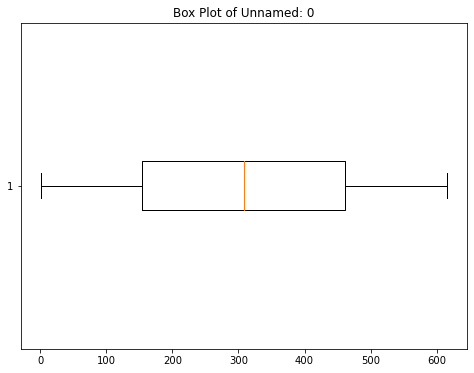

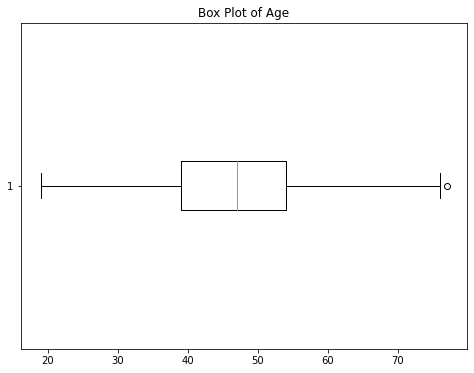

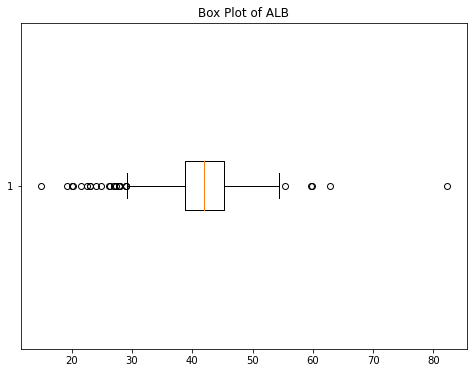

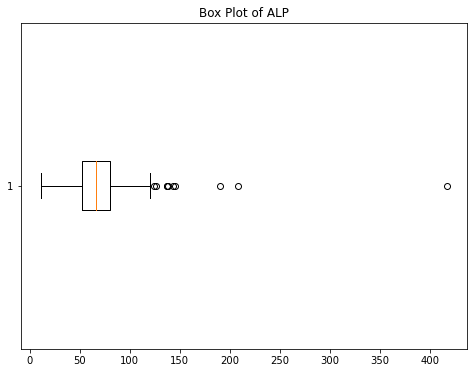

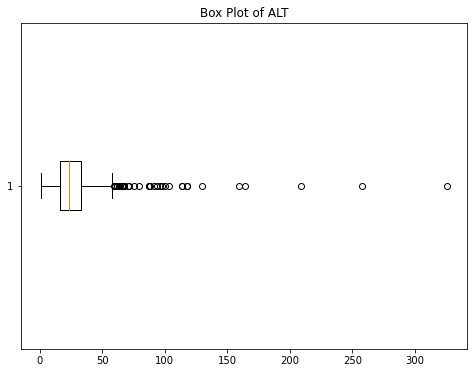

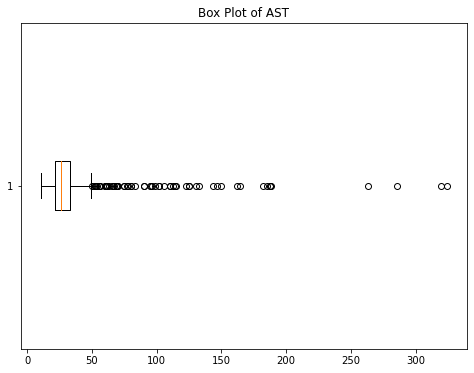

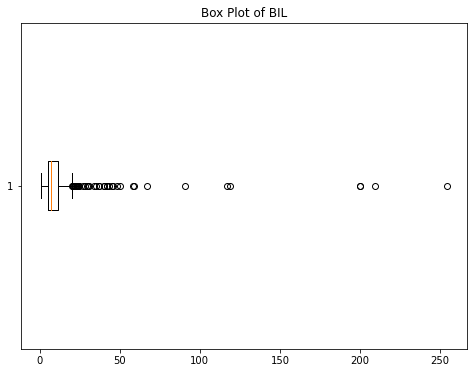

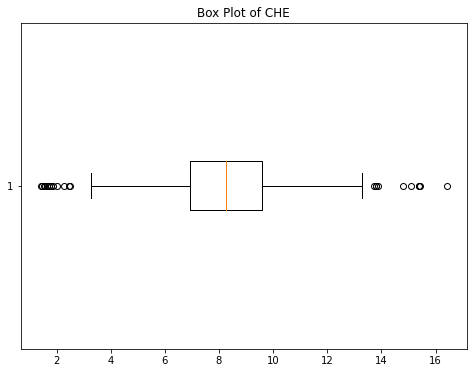

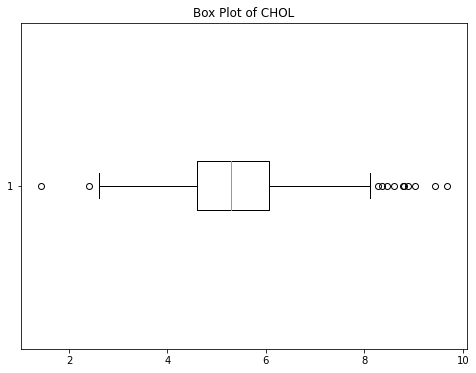

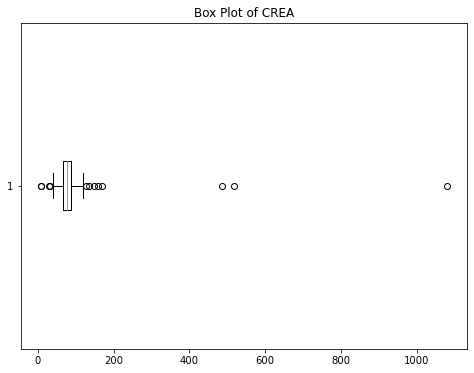

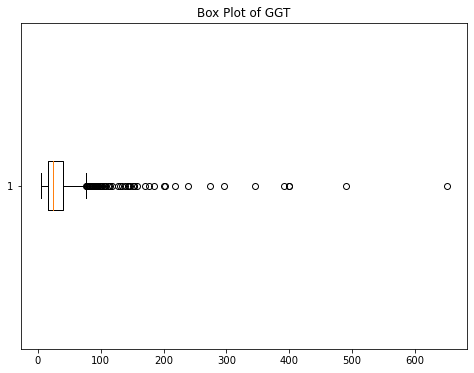

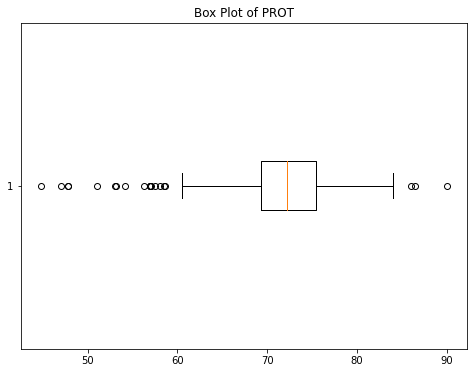

In [22]:
numerical_attributes = df_filled.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
for column in numerical_attributes.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_filled[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.show()


The classes are very unbalanced so a boxplot is made for each class and attribute

/var/folders/np/dhbqpzqs0p9cw8x5fjnht4z40000gn/T/ipykernel_8055/2495082873.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  attribute_means_by_category = df.groupby('Category').transform('mean')


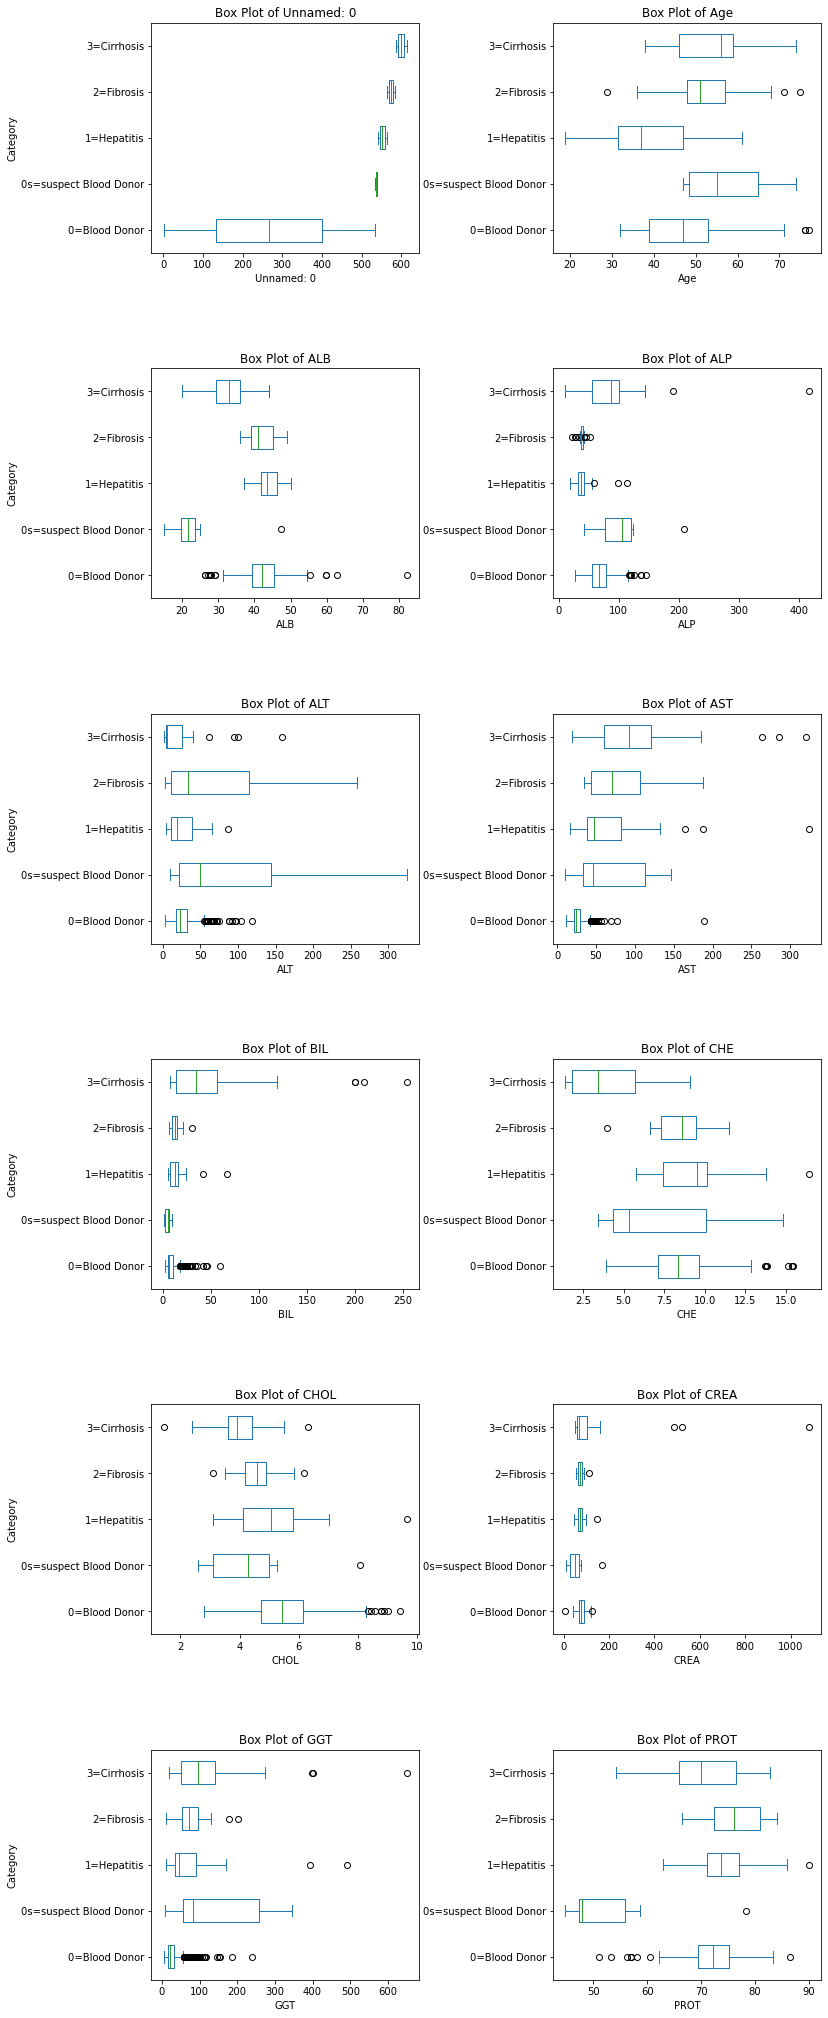

In [23]:

attribute_means_by_category = df.groupby('Category').transform('mean')

# Replace null values with the corresponding attribute mean within each category
df_filled = df.copy()
for column in df.columns[df.isnull().any()]:
    mask = df[column].isnull()
    category_values = df.loc[mask, 'Category']
    df_filled.loc[mask, column] = attribute_means_by_category.loc[mask, column].values

# Select only the numerical attributes for visualization
numerical_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Define the number of columns in the grid
num_columns = 2

# Calculate the number of rows needed
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 6 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots

# Iterate through numerical attributes
for idx, column in enumerate(numerical_columns):
    row = idx // num_columns
    col = idx % num_columns
    ax = axes[row, col]

    # Create a box plot for each attribute within each category
    df_box = df_filled.pivot(columns='Category', values=column)
    df_box.plot.box(ax=ax, vert=False)
    ax.set_title(f'Box Plot of {column}')
    ax.set_ylabel('Category')
    ax.set_xlabel(column)
    if col > 0:
        ax.yaxis.label.set_visible(False)  # Hide y-axis label for subplots in the same row

plt.show()


## Normalization

Normalization min-max

In [24]:
def normalize_minmax(df, min_val=-1, max_val=1):
    """
    Normalize a list of values to the specified range.
    Returns:
        list: The normalized values within the specified range.
    """
    normalized_df = df.copy()
    
    # Normalize numeric columns
    for column in normalized_df.select_dtypes(include=['number']).columns:
        min_data = normalized_df[column].min()
        max_data = normalized_df[column].max()

        if min_data == max_data:
            raise ValueError(f"All values in column '{column}' are equal. Cannot normalize.")

        normalized_df[column] = (normalized_df[column] - min_data) / (max_data - min_data) * (max_val - min_val) + min_val
    
    return normalized_df

In [26]:
def one_hot_encode_categorical(df):
    """
    Perform one-hot encoding on categorical columns in a DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with categorical columns one-hot encoded.
    """
    # Select only non-numerical (categorical) columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns
    
    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    df_encoded = df_encoded.astype('int64')
    
    return df_encoded


In [28]:
df2 = imputed_df.drop("Category", axis=1)
df_encoded= one_hot_encode_categorical(df2)
df_minmax= normalize_minmax(df_encoded)
print(df_minmax.head())

   Unnamed: 0       Age       ALB       ALP       ALT       AST       BIL  \
0   -1.000000 -0.551724 -0.294118 -0.797531 -0.956923 -0.923567 -0.944882   
1   -0.996743 -0.551724 -0.294118 -0.708642 -0.889231 -0.910828 -0.976378   
2   -0.993485 -0.551724 -0.058824 -0.688889 -0.778462 -0.732484 -0.952756   
3   -0.990228 -0.551724 -0.147059 -0.797531 -0.815385 -0.923567 -0.858268   
4   -0.986971 -0.551724 -0.264706 -0.688889 -0.803077 -0.910828 -0.929134   

        CHE  CHOL      CREA       GGT      PROT  Sex_f  Sex_m  
0 -0.333333 -0.50 -0.816993 -0.975232  0.086957   -1.0    1.0  
1  0.333333 -0.25 -0.876751 -0.965944  0.391304   -1.0    1.0  
2 -0.066667  0.00 -0.854342 -0.910217  0.521739   -1.0    1.0  
3 -0.200000 -0.25 -0.865546 -0.910217  0.347826   -1.0    1.0  
4  0.066667 -0.25 -0.873016 -0.922601  0.043478   -1.0    1.0  


Log Transform

In [32]:
def normalize_log(df, shift_value=1, base=10):
    """
    Apply log transformation normalization to a DataFrame after shifting values.
    
    Returns:
        pd.DataFrame: The normalized DataFrame with log-transformed values.
    """
    normalized_df = df.copy()

    # Shift and normalize numeric columns
    for column in normalized_df.select_dtypes(include=['number']).columns:
        normalized_df[column] = np.log(normalized_df[column] + shift_value) / np.log(base)

    return normalized_df

In [33]:
df_log= normalize_log(df_encoded)
print(df_log.head())

   Unnamed: 0       Age       ALB       ALP       ALT       AST       BIL  \
0    0.301030  1.518514  1.591065  1.724276  0.903090  1.361728  0.903090   
1    0.477121  1.518514  1.591065  1.851258  1.278754  1.397940  0.602060   
2    0.602060  1.518514  1.672098  1.875061  1.568202  1.724276  0.845098   
3    0.698970  1.518514  1.643453  1.724276  1.491362  1.361728  1.278754   
4    0.778151  1.518514  1.602060  1.875061  1.518514  1.397940  1.000000   

        CHE      CHOL      CREA       GGT      PROT  Sex_f    Sex_m  
0  0.845098  0.602060  2.029384  1.113943  1.845098    0.0  0.30103  
1  1.079181  0.698970  1.875061  1.204120  1.886491    0.0  0.30103  
2  0.954243  0.778151  1.939519  1.531479  1.903090    0.0  0.30103  
3  0.903090  0.698970  1.908485  1.531479  1.880814    0.0  0.30103  
4  1.000000  0.698970  1.886491  1.477121  1.838849    0.0  0.30103  
